In [1]:
#@title Imports 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
from Data import Data
from Pha3D import Pha3D
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    
#GIT = 'https://github.com/tyokokur/tmpdat/raw/main/sysg3/'
#''' If SSL error _ssl.c:997: 
#    pip install --upgrade certifi'''

from sysg3_data import *
morph_ms = {
    'mic': {'marker':'^', 'c':'blue'  , 'ms':10}, 
    'cyl': {'marker':'d', 'c':'purple', 'ms':10},
    'cyl-str': {'marker':'*', 'c':'red', 'ms':12},
    'str': {'marker':'s', 'c':'orange', 'ms':8 }, 
    'hol': {'marker':'o', 'c':'green' , 'ms':10}, 
    'hom': {'marker':'X', 'c':'black' , 'ms':8}
}

tjy_udf:  ['CalcF', 'H_find', 'Heights', 'Kap_D', 'elread', 'get_fp', 'get_fs', 'git_sync', 'lighten_color', 'phread', 'phreadxyz', 'plot_anim', 'plot_pha', 'plot_pha_feed', 'ticks']


In [1]:
## Local
fp_work, fp_home = 'C:/Users/takas/Downloads/', 'E:/Downloads/' 
fp = fp_work

## Files needed locally
f1_fnames = []

f3_fnames = ['ph_a30s5e3_cyl.dat', 'ph_a30s020_cyl.dat', 'ph_a30s030_cyl-str.dat', 'ph_a30s055_str.dat']
f3_boxes  = [(), (), (12.2, 18.2, 70.2), (10.2, 20.2, 100.2)]

f6_fnames = ['ph_a20s020_mic-mul.dat', 'ph_a30s020_str-mul.dat', 'ph_a30s040_hom-mul.dat']
f6_boxes  = []

# Figure 1

# Figure 2

# Figure 3

# Figure 4

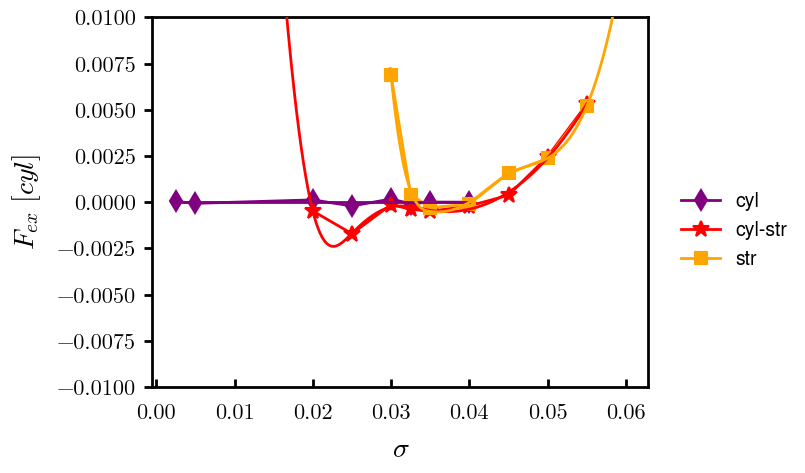

In [6]:
from scipy.interpolate import UnivariateSpline

## Inputs
const = 'alpha'
const_val = 0.30
morph_rs = {'cyl': (0.0025, 0.040), 'cyl-str': (0.015, 0.055), 'str': (0.030, 0.060)}
ref_morph = 'cyl'
s = 1e-07
k = 3

## Run
ms = ('mic', 'cyl', 'str', 'hol', 'mul', 'hom')
ms = ('cyl', 'cyl-str', 'str')
if const == 'alpha': var = 'sigma'
elif const=='sigma': var = 'alpha'

D = All.all[All.all.loc[:,const] == const_val]

d = D[D.loc[:,'morph']==ref_morph].reset_index()
y = [i.minF() for i in d.data]
x = d.loc[:,var]
ref = UnivariateSpline(x, y, s=s, k=k)
    
for m in ms: 
    d = D[D.loc[:,'morph']==m].reset_index()
    d = d[d.loc[:,'multi']==False].reset_index()
    y = [i.minF() for i in d.data]
    x = d.loc[:,var]
    plt.plot(x, y-ref(x),**morph_ms[m], lw=2, zorder=2, label=m)
    
    fit = UnivariateSpline(x, y, s=s, k=k)
    xss = np.arange(morph_rs[m][0]-1e-04, morph_rs[m][1]+1e-04, 1e-04)
    plt.plot(xss, fit(xss)-ref(xss), morph_ms[m]['c'], zorder=3)

if const == 'alpha': 
    xl = r'$\sigma$'
elif const=='sigma': 
    xl = r'$\alpha$'
    
plt.xlabel(xl)
plt.ylabel(r'$F_{ex}$ '+'$[{:s}]$'.format(ref_morph))
plt.legend(loc=(1.05,0.3))
plt.ylim(-0.01, 0.01)
tjy.ticks()

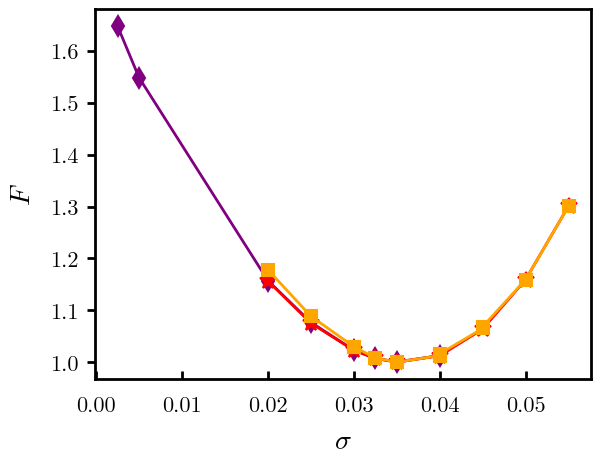

In [156]:
const = 'alpha'
const_val = 0.30
ms = ('mic', 'cyl', 'str', 'hol', 'mul', 'hom')
ms = ('cyl', 'cyl-str', 'str')

if const == 'alpha': var = 'sigma'
elif const=='sigma': var = 'alpha'

## subtract line ##
SUB_LINE = True
(x1, y1), (x2, y2) = (0.0025, -3), (0.055, -29)
slope = (y2-y1)/(x2-x1)
yint = -(slope*x2-y2)
xss = np.arange(0.0025, 0.055, 1e-04)
yss = lambda x: yint + slope*x
# plt.plot(xss, yss(xss), '--k')
####################

D = All.all[All.all.loc[:,const] == const_val]
for m in ms: 
    d = D[D.loc[:,'morph']==m].reset_index()
    if SUB_LINE: y = [i.minF() - yss(i.sigma) for i in d.data]
    else: y = [i.minF() for i in d.data]
    plt.plot(d.loc[:,var], y, **morph_ms[m])

if const == 'alpha': 
    xl = r'$\sigma$'
elif const=='sigma': 
    xl = r'$\alpha$'
    

    
plt.xlabel(xl)
plt.ylabel(r'$F$')
tjy.ticks()

# Figure 5

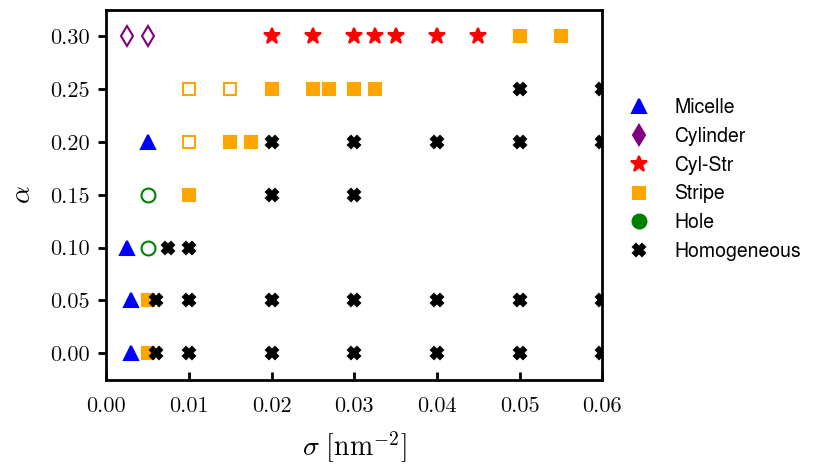

In [4]:

leg_ms = [Line2D([0],[0], **morph_ms[mor], lw=0) for mor in morph_ms.keys()]
leg_labs=['Micelle', 'Cylinder', 'Cyl-Str', 'Stripe', 'Hole', 'Homogeneous']

def get_Morph(a,s):
    AX = All.all[All.all.loc[:,'alpha'] == a]
    AXSY = AX[AX.loc[:,'sigma'] == s].reset_index()
    return AXSY.morph[np.nanargmin([i.minF() for i in AXSY.data])], min([i.minF() for i in AXSY.data]), AXSY.multi[np.nanargmin([i.minF() for i in AXSY.data])], AXSY.done.to_list()

for (a,s) in [(0.00, i) for i in (3e-03, 5e-03, 6e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.05, i) for i in (3e-03, 5e-03, 6e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.10, i) for i in (2.5e-03, 5e-03, 7.5e-03, 1e-02)] +\
             [(0.15, i) for i in (5e-03, 1e-02, 2e-02, 3e-02)] +\
             [(0.20, i) for i in (5e-03, 1e-02, 1.5e-02, 1.75e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.25, i) for i in (1.0e-02, 1.5e-02, 2e-02, 2.5e-02, 2.7e-02, 3e-02, 3.25e-02, 5e-02, 6e-02)] +\
             [(0.30, i) for i in (2.5e-03, 5e-03, 2e-02, 2.5e-02, 3e-02, 3.25e-02, 3.5e-02, 
                                  4e-02, 4.5e-02, 5e-02, 5.5e-02)]:
    morph, minF, mul, done = get_Morph(a,s)
    x,y,mor = s, a, morph
    
    if done == [True]*len(done): 
        if mul:  plt.plot(x,y, lw=0, **morph_ms[mor], mfc=tjy.lighten_color(morph_ms[mor]['c'], 0.3))
        else:     plt.plot(x,y, lw=0, **morph_ms[mor])
    else:  plt.plot(x,y, lw=0, **morph_ms[mor], mfc='w')

plt.xlabel(r'$\sigma\ [\mathrm{nm}^{-2}]$')
plt.xlim(0, 0.060)
plt.ylabel(r'$\alpha$')
plt.ylim(-0.025,0.325)
plt.legend(leg_ms, leg_labs, loc=(1.02,0.3))
tjy.ticks()